<a href="https://colab.research.google.com/github/ashmit29/AIML/blob/main/Experiment_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Original Dataset:
   numerical_column categorical_column
0              10.0                  A
1              12.0                  B
2               NaN                  A
3              25.0                  B
4              30.0                NaN
5              28.0                  A
6             100.0                  B
7              50.0                  B
8              45.0                  A
9             200.0                  B

Missing values in each column:
 numerical_column      1
categorical_column    1
dtype: int64

Detected outliers:
    numerical_column categorical_column
6             100.0                  B
9             200.0                  B


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


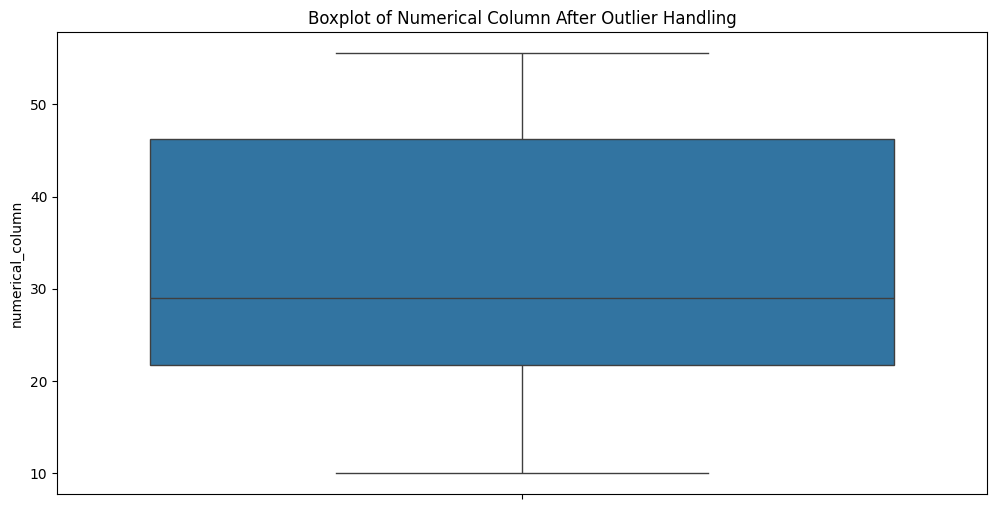

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Sample dataset creation
data = {
    'numerical_column': [10, 12, np.nan, 25, 30, 28, 100, 50, 45, 200],
    'categorical_column': ['A', 'B', 'A', 'B', np.nan, 'A', 'B', 'B', 'A', 'B']
}
df = pd.DataFrame(data)

# Display the original dataset
print("Original Dataset:")
print(df)

# Check for missing values
missing_values = df.isnull().sum()
print("\nMissing values in each column:\n", missing_values[missing_values > 0])

# Impute missing values for numerical and categorical columns
if 'numerical_column' in df.columns:
    df['numerical_column'] = df['numerical_column'].fillna(df['numerical_column'].mean())
if 'categorical_column' in df.columns:
    df['categorical_column'] = df['categorical_column'].fillna(df['categorical_column'].mode()[0])

# Drop rows with any remaining missing values (if necessary)
df = df.dropna()

# Function to detect outliers using IQR
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return lower_bound, upper_bound

# Detect and handle outliers in a numerical column
if 'numerical_column' in df.columns:
    lower_bound, upper_bound = detect_outliers_iqr(df, 'numerical_column')
    outliers = df[(df['numerical_column'] < lower_bound) | (df['numerical_column'] > upper_bound)]
    print("\nDetected outliers:\n", outliers)

    # Remove outliers
    df = df[~df['numerical_column'].isin(outliers['numerical_column'])]

    # Cap outliers
    df['numerical_column'] = np.where(df['numerical_column'] > upper_bound, upper_bound,
                                       np.where(df['numerical_column'] < lower_bound, lower_bound,
                                                df['numerical_column']))

# Boxplot to visualize outliers before and after handling
plt.figure(figsize=(12, 6))
sns.boxplot(data=df['numerical_column'])
plt.title('Boxplot of Numerical Column After Outlier Handling')
plt.show()

# Save the cleaned dataset
df.to_csv('cleaned_dataset.csv', index=False)